In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2
from PIL import Image

(-0.5, 516.5, 373.5, -0.5)

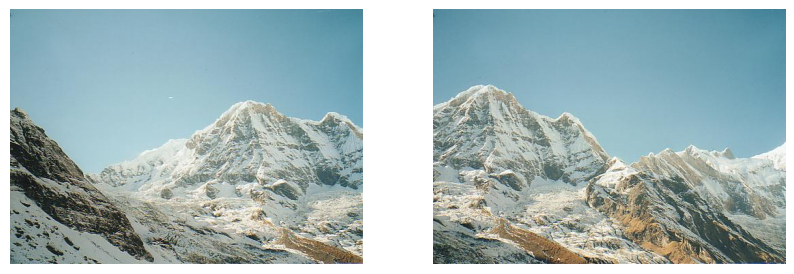

In [10]:
image1 = Image.open("./image/mountain1.jpg")
image2 = Image.open("./image/mountain2.jpg")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image1)
ax2.imshow(image2)
ax1.axis("off")
ax2.axis("off")

(-0.5, 516.5, 373.5, -0.5)

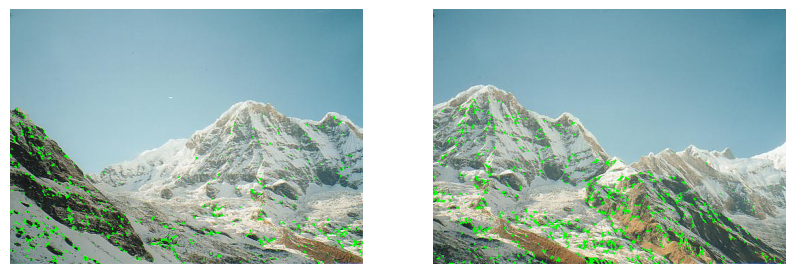

In [24]:
def harris_corner_detector(image, k=0.06, threshold=0.01):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Calculate image gradients using Sobel operators
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calculate Harris corner response
    Ix2 = Ix * Ix
    Iy2 = Iy * Iy
    IxIy = Ix * Iy

    # Apply Gaussian blurring to the gradient products because Forstner–Harris
    # proposed using a Gaussian weighting window
    Ix2 = cv2.GaussianBlur(Ix2, (3, 3), 0)
    Iy2 = cv2.GaussianBlur(Iy2, (3, 3), 0)
    IxIy = cv2.GaussianBlur(IxIy, (3, 3), 0)
    
    # Calculate the corner response function R
    det = Ix2 * Iy2 - IxIy * IxIy
    trace = Ix2 + Iy2
    R = det - k * trace * trace
    image[R > threshold * R.max()] = [0, 255, 0]
    return image

# Perform corner detection
edge_detected_image1 = harris_corner_detector(np.array(image1), threshold=0.05)
edge_detected_image2 = harris_corner_detector(np.array(image2), threshold=0.05)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(edge_detected_image1)
ax2.imshow(edge_detected_image2)
ax1.axis("off")
ax2.axis("off")